In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import matplotlib.font_manager as fm 
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc' 
font = fm.FontProperties(fname=font_path).get_name() 
matplotlib.rc('font', family=font) 

In [8]:
# 데이터 로드
X_train = pd.read_csv('./data/train_features.csv')
X_test = pd.read_csv('./data/test_features.csv')
X_valid = pd.read_csv('./data/val_features.csv')
y_train = pd.read_csv('./data/train_target.csv')
y_test = pd.read_csv('./data/test_target.csv')
y_valid = pd.read_csv('./data/val_target.csv')

In [9]:
# 모델 생성
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    verbose=100,
    random_state=42
)

# 모델 학습
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)

0:	learn: 0.6998683	test: 0.6834825	best: 0.6834825 (0)	total: 15ms	remaining: 7.48s
100:	learn: 0.7549589	test: 0.7230811	best: 0.7244372 (96)	total: 1.25s	remaining: 4.95s
200:	learn: 0.7849837	test: 0.7257933	best: 0.7279631 (183)	total: 2.47s	remaining: 3.67s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7279631136
bestIteration = 183

Shrink model to first 184 iterations.


In [10]:
# 예측 및 평가
from sklearn.metrics import classification_report, confusion_matrix

# 예측
y_pred = model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      3568
           1       0.76      0.61      0.68      3808

    accuracy                           0.70      7376
   macro avg       0.71      0.70      0.70      7376
weighted avg       0.71      0.70      0.70      7376

[[2819  749]
 [1484 2324]]


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

# 설정할 파라미터
params = {
    'depth': range(1, 10, 1),            
    'learning_rate': np.arange(0.01, 0.1, 0.01),    
    'iterations': range(100, 500, 100)   
}

# 모델 생성
model = CatBoostClassifier(verbose=0, random_state=42)

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=3,
    scoring='accuracy',      
    n_jobs=-1,              
    verbose=1,               
    refit=True,              
    return_train_score=True   
)

# 모델 학습
grid.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# 결과 
print('최적의 파라미터:', grid.best_params_) 
print('최적화된 모델 객체:', grid.best_estimator_) 
print('최적화된 점수:', grid.best_score_) 

Fitting 3 folds for each of 324 candidates, totalling 972 fits
최적의 파라미터: {'depth': 7, 'iterations': 100, 'learning_rate': np.float64(0.06999999999999999)}
최적화된 모델 객체: <catboost.core.CatBoostClassifier object at 0x000002BED09211F0>
최적화된 점수: 0.7190841469084148


In [11]:
# 최적화된 파라미터 모델

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.06999999999999999,
    depth=7,
    eval_metric='Accuracy',
    verbose=100,
    random_state=42
)

# 모델 학습
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)

# 예측
y_pred = model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0:	learn: 0.6999458	test: 0.6823976	best: 0.6823976 (0)	total: 18.9ms	remaining: 1.87s
99:	learn: 0.7556563	test: 0.7200976	best: 0.7200976 (90)	total: 1.72s	remaining: 0us

bestTest = 0.7200976404
bestIteration = 90

Shrink model to first 91 iterations.
              precision    recall  f1-score   support

           0       0.65      0.82      0.72      3568
           1       0.78      0.58      0.67      3808

    accuracy                           0.70      7376
   macro avg       0.71      0.70      0.70      7376
weighted avg       0.71      0.70      0.69      7376

[[2927  641]
 [1585 2223]]


In [12]:
# 결과 확인
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 확률 예측값
y_proba = model.predict_proba(X_test)[:, 1]

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 출력
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.6982 (69.82%)
Precision: 0.7762 (77.62%)
Recall: 0.5838 (58.38%)
F1 Score: 0.6664
AUC: 0.7892


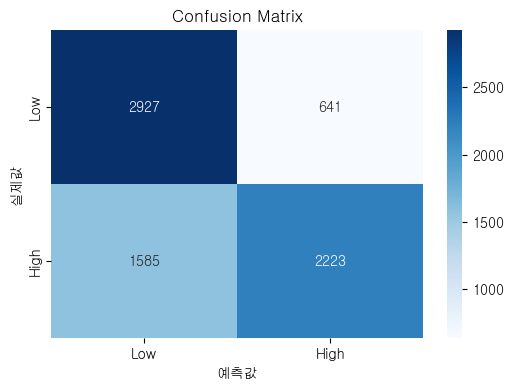

In [13]:
# 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('Confusion Matrix')
plt.show()

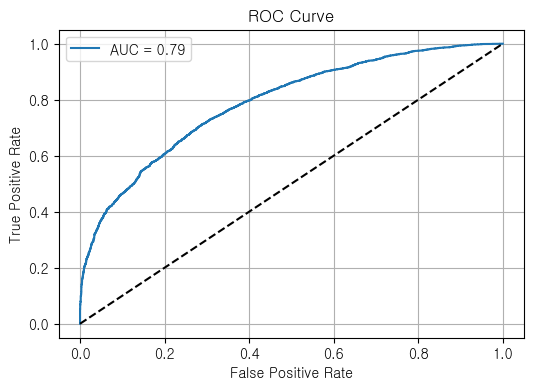

In [14]:
# ROC Curve 
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률
y_probs = model.predict_proba(X_test)[:, 1]

# ROC 커브
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\kouls\AppData\Local\Temp\ipykernel_37216\155178189.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


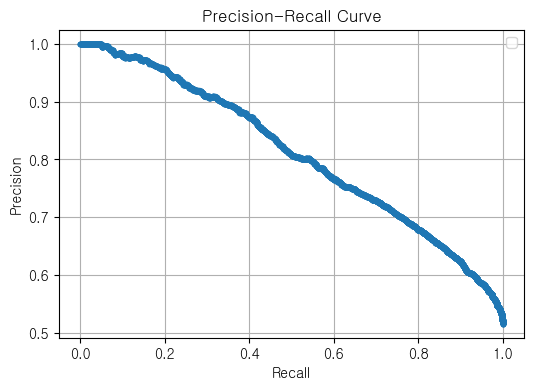

In [15]:
# PR Curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()